In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# cities = [('Seattle', 'WA', 'http://data.seattle.gov/data.json')]
cities = [('Austin', 'TX', 'https://data.austintexas.gov/data.json', 1855),
('San Francisco', 'CA', 'https://data.sfgov.org/data.json', 1845),
('Las Vegas', 'NV', 'https://opendata.lasvegasnevada.gov/data.json', 1830),
('New York', 'NY', 'https://data.cityofnewyork.us/data.json', 1740),
('Los Angeles', 'CA', 'https://data.lacity.org/data.json', 1710),
('Chicago', 'IL', 'https://data.cityofchicago.org/data.json', 1655),
('Philadelphia', 'PA', 'https://www.opendataphilly.org/data.json', 1595),
('Santa Monica', 'CA', 'https://data.smgov.net/data.json', 1560),
('San Diego', 'CA', 'https://data.sandiego.gov/data.json', 1550),
('Anchorage', 'AK', 'https://data.muni.org/data.json', 1430),
('Baton Rouge', 'LA', 'https://data.brla.gov/data.json', 1425),
('Seattle', 'WA', 'http://data.seattle.gov/data.json', 1410),
('Boston', 'MA', 'https://data.boston.gov/data.json', 1390),
('Sacramento', 'CA', 'https://data.cityofsacramento.org/data.json', 1385),
('Providence', 'RI', 'https://data.providenceri.gov/data.json', 1380)]


In [5]:
city_output = {}

In [6]:
for current_city in cities:
    city, state, url, rating = current_city
    r = requests.get(url=url)
    data = r.json()
    print(data.keys())
    number_of_datasets = len(data['dataset'])
    print("Info on {}, {}".format(city, state))
    print("Number of datasets = {}".format(number_of_datasets))

    # tally counts of keywords and themes
    keyword_counts = {}
    theme_counts = {}

    for dataset in data['dataset']:
        keywords = dataset.get('keyword')
        themes = dataset.get('theme')

        if keywords:
            for k in keywords:
                if k not in keyword_counts:
                    keyword_counts[k] = 1
                else:
                    keyword_counts[k] +=1

        if themes:
            for t in themes:
                if t not in theme_counts:
                    theme_counts[t] = 1
                else:
                    theme_counts[t] +=1


    sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

    sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)

    name_phrase = "{}, {}".format(city, state)
    city_output[name_phrase] = {'datasets': number_of_datasets,
                                'keywords' : sorted_keywords,
                                'themes' : sorted_themes,
                               'rating' : rating}

dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on Austin, TX
Number of datasets = 1300
dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on San Francisco, CA
Number of datasets = 534
dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on Las Vegas, NV
Number of datasets = 225
dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on New York, NY
Number of datasets = 2026
dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on Los Angeles, CA
Number of datasets = 304
dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on Chicago, IL
Number of datasets = 736
dict_keys(['conformsTo', 'describedBy', '@context', '@type', 'dataset'])
Info on Philadelphia, PA
Number of datasets = 362
dict_keys(['@context', '@id', '@type', 'conformsTo', 'describedBy', 'dataset'])
Info on Santa Monica, CA
Number o

In [7]:
print(len(city_output))

15


In [8]:
cities = city_output.keys()

In [9]:
cities_and_datasets = [(c, city_output[c]['datasets']) for c in cities]
labels = ['city', 'datasets']

In [10]:
df = pd.DataFrame.from_records(cities_and_datasets, columns=labels)

In [11]:
import seaborn as sns

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 10))
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x='city', y='datasets', data=df, palette="GnBu_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0,0,'Austin, TX'),
 Text(0,0,'San Francisco, CA'),
 Text(0,0,'Las Vegas, NV'),
 Text(0,0,'New York, NY'),
 Text(0,0,'Los Angeles, CA'),
 Text(0,0,'Chicago, IL'),
 Text(0,0,'Philadelphia, PA'),
 Text(0,0,'Santa Monica, CA'),
 Text(0,0,'San Diego, CA'),
 Text(0,0,'Anchorage, AK'),
 Text(0,0,'Baton Rouge, LA'),
 Text(0,0,'Seattle, WA'),
 Text(0,0,'Boston, MA'),
 Text(0,0,'Sacramento, CA'),
 Text(0,0,'Providence, RI')]

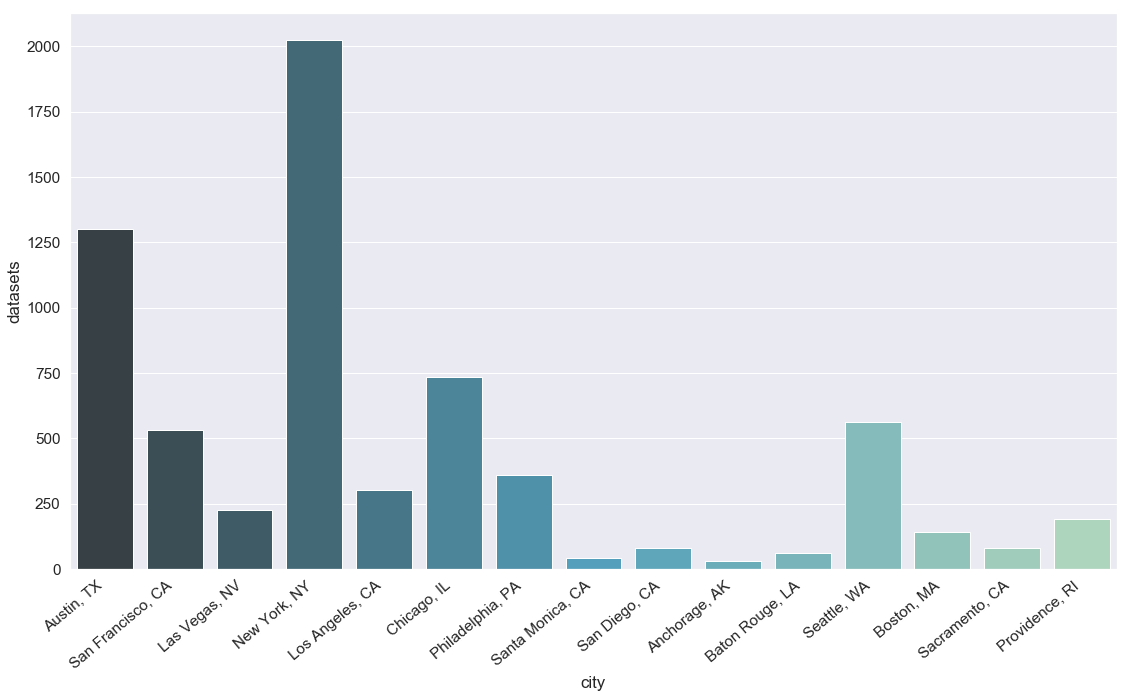

In [13]:
plt.tight_layout()
plt.show()

In [14]:
k_labels = ['keyword', 'count']

In [15]:
df_seattle_keys = pd.DataFrame.from_records(city_output['Seattle, WA']['keywords'], columns=k_labels)

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 16))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(y='keyword', x='count', data=df_seattle_keys[0:30], palette="GnBu_d")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

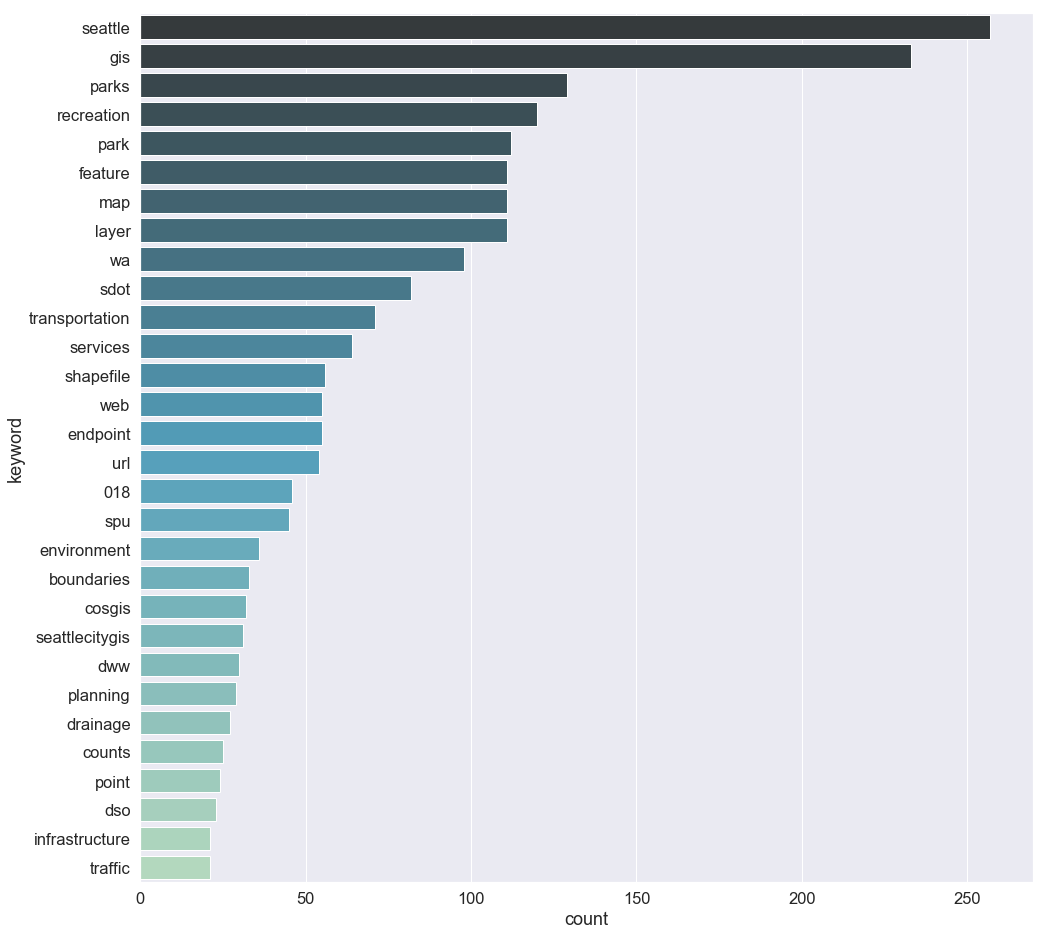

In [17]:
plt.show()

In [18]:
df_austin_keys = pd.DataFrame.from_records(city_output['Austin, TX']['keywords'], columns=k_labels)

In [27]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 16))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(y='keyword', x='count', data=df_austin_keys[0:30], palette="GnBu_d")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

# sns.plotting_context(font_scale=2)
# plt.xticks(rotation=66)

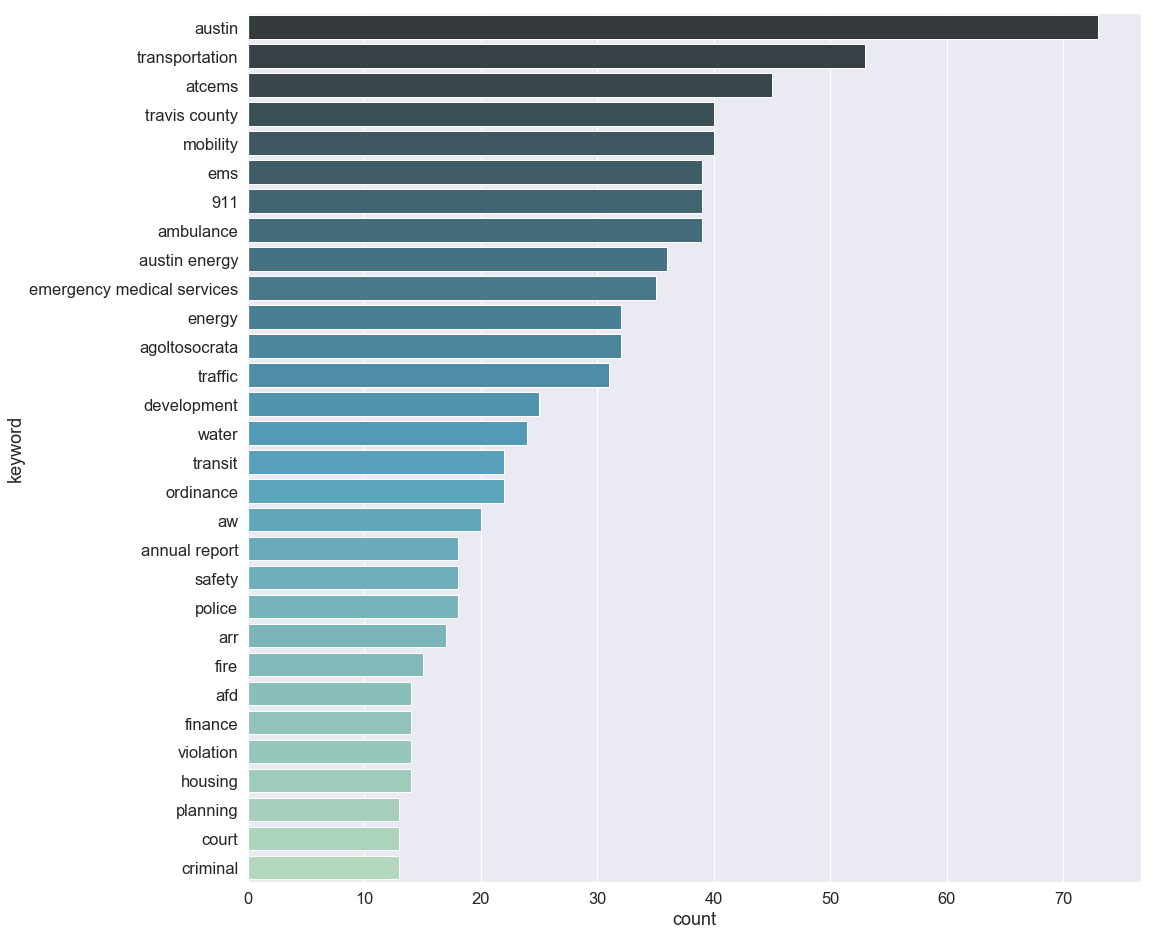

In [28]:
plt.show()

In [29]:
df_lv_keys = pd.DataFrame.from_records(city_output['Las Vegas, NV']['keywords'], columns=k_labels)

In [30]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 16))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(y='keyword', x='count', data=df_lv_keys[0:30], palette="GnBu_d")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

# sns.plotting_context(font_scale=2)
# plt.xticks(rotation=66)

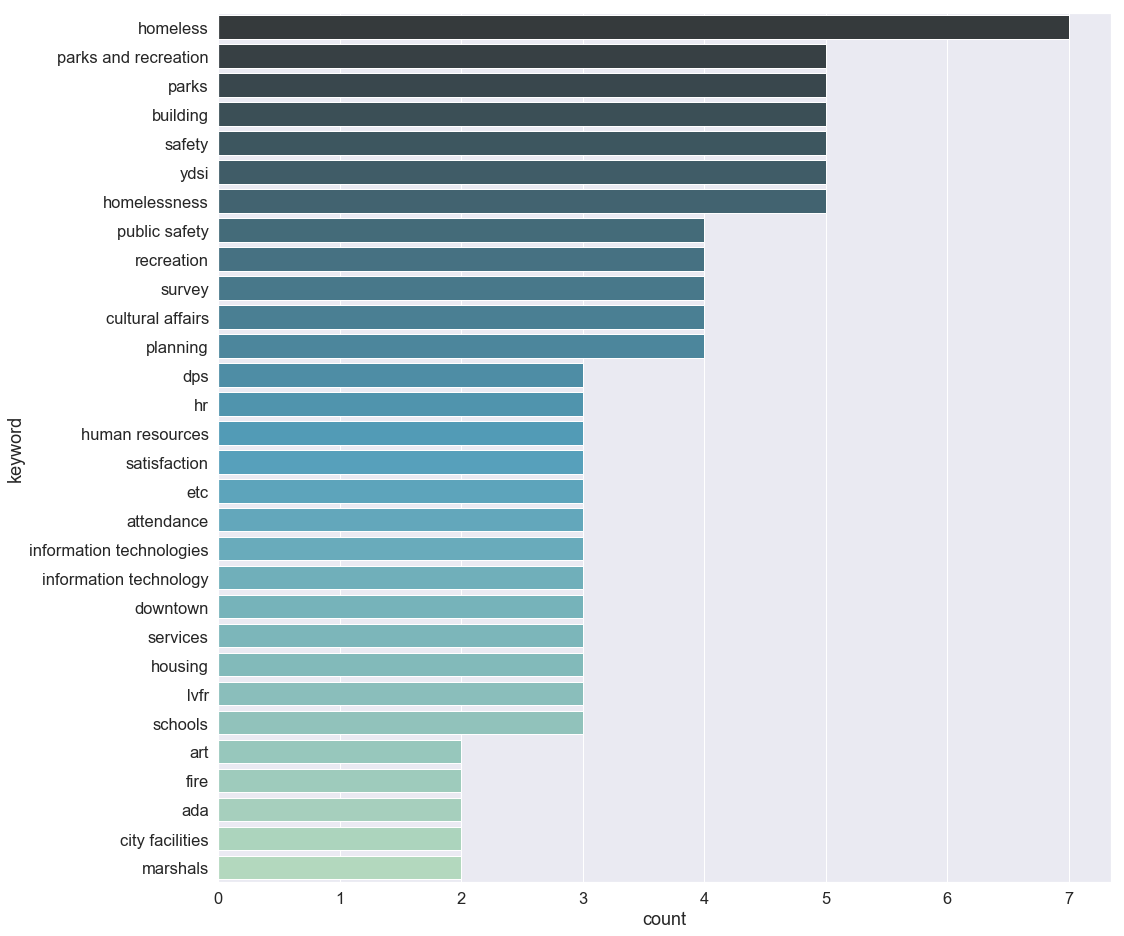

In [31]:
plt.show()

In [32]:
df_prov_keys = pd.DataFrame.from_records(city_output['Providence, RI']['keywords'], columns=k_labels)

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 16))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.barplot(y='keyword', x='count', data=df_prov_keys[0:30], palette="GnBu_d")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

# sns.plotting_context(font_scale=2)
# plt.xticks(rotation=66)

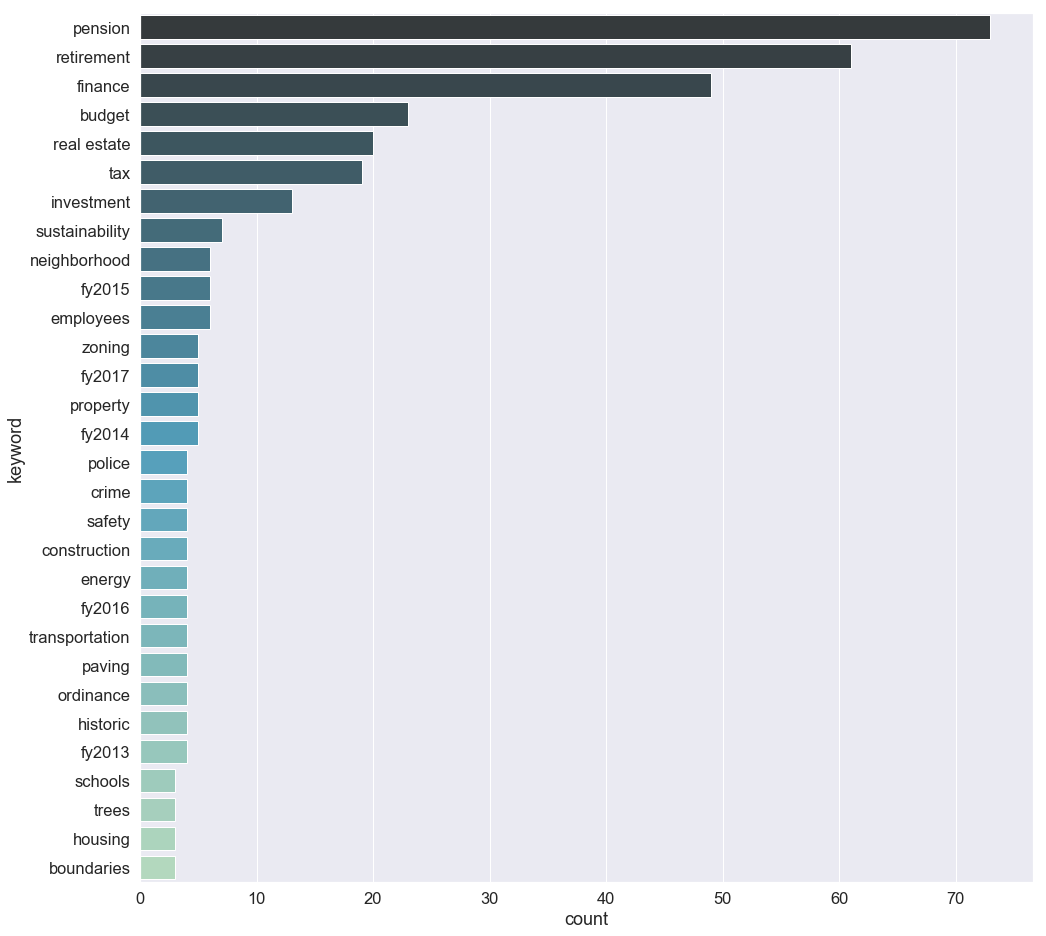

In [34]:
plt.show()